In [61]:
import matplotlib.pyplot as plt
import pandas as pd
from ISLP import load_data

from lifelines import \
    (KaplanMeierFitter ,
     CoxPHFitter)

In [62]:
dataset = load_data("Publication")
dataset

,posres,multi,clinend,mech,sampsize,budget,impact,time,status
0,0,0,1,R01,39876,8.016941,44.016,11.203285,1
1,0,0,1,R01,39876,8.016941,23.494,15.178645,1
2,0,0,1,R01,8171,7.612606,8.391,24.410678,1
3,0,0,1,Contract,24335,11.771928,15.402,2.595483,1
4,0,0,1,Contract,33357,76.517537,16.783,8.607803,1
...,...,...,...,...,...,...,...,...,...
239,0,0,0,R01,4105,2.703653,5.355,65.018480,1
240,1,0,0,R44,181,1.117084,0.000,66.989733,0
241,0,0,0,K23,104,0.472321,0.000,9.987680,0
242,0,0,0,R21,69,0.404710,0.000,21.979466,0


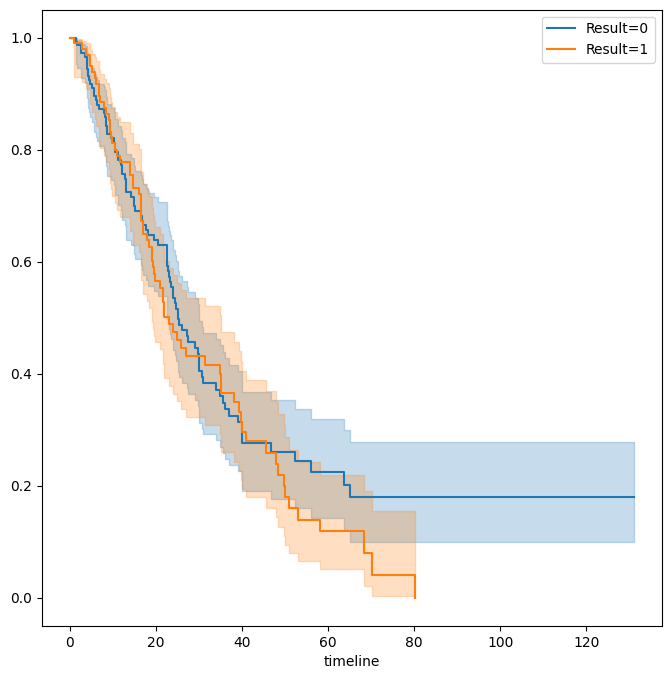

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
by_result = {}
for result, df in dataset.groupby("posres"):
    by_result[result] = df
    km_result = KaplanMeierFitter().fit(df["time"], df["status"])
    km_result.plot(label=f"Result={result}", ax=ax)

In [64]:
posres_df = dataset[["posres", "time", "status"]]
posres_fit = CoxPHFitter().fit(posres_df, "time", "status")
posres_fit.summary[["coef", "se(coef)", "p"]]

,coef,se(coef),p
covariate,,,
posres,0.148076,0.161625,0.359579


In [65]:
all_but_mech = dataset[dataset.columns.drop("mech")]
all_fit = CoxPHFitter().fit(all_but_mech, "time", "status")
all_fit.summary[["coef", "se(coef)", "p"]]

,coef,se(coef),p
covariate,,,
posres,0.570773,0.175960,1.179610e-03
multi,-0.040860,0.251194,8.707842e-01
clinend,0.546183,0.262000,3.709944e-02
sampsize,0.000005,0.000015,7.507005e-01
budget,0.004386,0.002465,7.515984e-02
impact,0.058318,0.006676,2.426306e-18


In [66]:
posres = all_but_mech["posres"].unique()

def representative(series):
    if hasattr(series.dtype , 'categories') or len(series.unique()) < 8:
        return pd.Series.mode(series)
    else:
        return series.mean()

modal_data = all_but_mech.apply(representative, axis=0)
modal_data.loc[1] = modal_data.loc[0]
modal_data["posres"] = posres
modal_data

,posres,multi,clinend,sampsize,budget,impact,time,status
0,0,0.0,0.0,2000.57377,8.28375,11.344799,24.718484,1.0
1,1,0.0,0.0,2000.57377,8.28375,11.344799,24.718484,1.0


In [67]:
pred = all_fit.predict_survival_function(modal_data)
pred

,0,1
0.985626,0.998778,0.997839
1.478439,0.997555,0.995677
1.544148,0.996325,0.993506
2.464066,0.995092,0.991330
2.595483,0.993855,0.989151
...,...,...
89.987680,0.078786,0.011146
119.063655,0.078786,0.011146
120.016427,0.078786,0.011146
130.004107,0.078786,0.011146


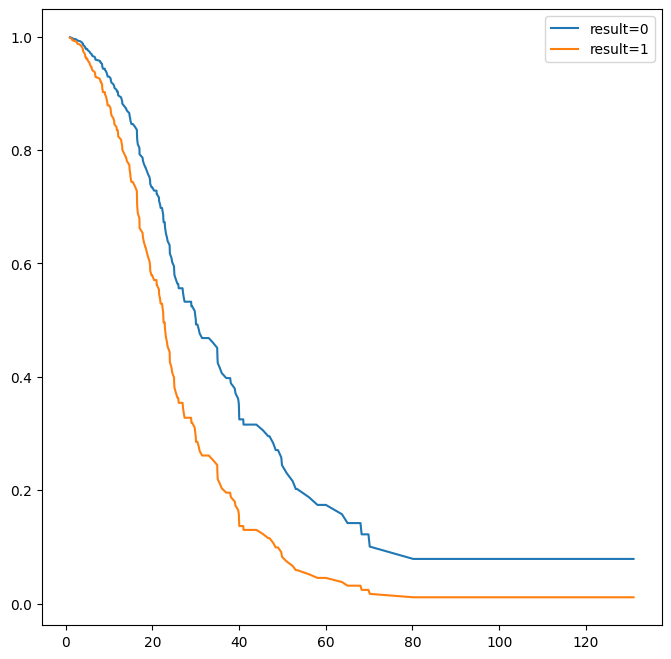

In [68]:
fig, ax = plt.subplots(figsize=(8,8))
pred.plot(ax=ax)
ax.legend([f"result={cat}" for cat in posres]);